<a href="https://colab.research.google.com/github/henrique-giacomini/exemplos-pymatgen/blob/main/pymatgen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeiros passos com Materials Project: Configurando o ambiente 

O *Google Colab*  é um serviço de *cloud computing* gratuito, que fornece uma plataforma integrada ao drive e que contém *notebooks* python. Este ambiente de execução (colab notebooks) conta com uma variedade de bibliotecas de computação científica já instaladas, como as tradicionais [Numpy](https://numpy.org/), [Scipy](https://scipy.org/), [Pandas](https://pandas.pydata.org/), bem como bibliotecas de visualização de dados [Matplotlib](https://matplotlib.org/), [Plotly](https://plotly.com/) e bibliotecas de aprendizagem de máquina, como [scikit-learn](https://scikit-learn.org/stable/).

Além dessas bibliotecas extras, o ambiente colab conta com os recursos da biblioteca padrão python. Inicialmente vamos usar o módulo *sys* para acessar os recursos da máquina virtual hospedando esse notebook para verificar qual a versão do python instalada.

In [ ]:
import sys
print(sys.version)

3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]


## Materials Project

Estamos interessados em acessar os dados disponibilizados pela inciativa [*Materials Project*](https://next-gen.materialsproject.org/). As bases são mantidas por diversas instituições, com origem em países distintos e tem como objetivo "*reduzir drasticamente o tempo gasto para inventar novos materiais concentrando experimentos caros e demorados em compostos que se mostram mais promissores computacionalmente*".  

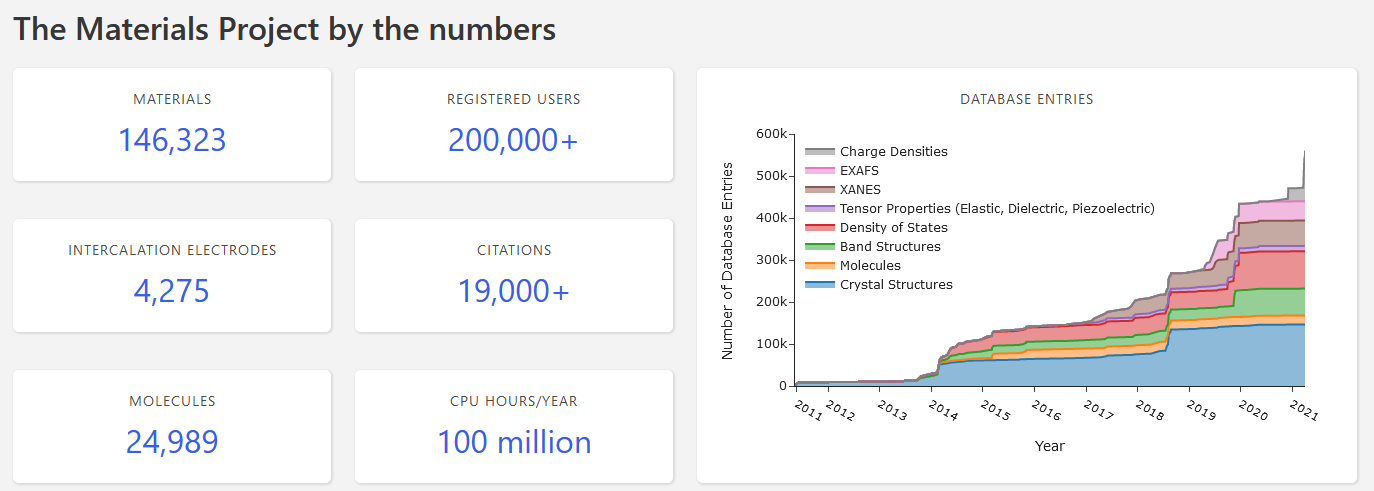


Há basicamente três formas de consultar os dados disponibilizados.


1.   Acessar as páginas relativas aos conteúdos.
2.   Acessar os dados por requisições na API do projeto.
3.   Usar uma biblioteca (*pymatgen*).

A primeira opção é inadequada para o uso de métodos de aprendizagem de máquina, já que consiste em consultar individualmente as informações, análogo a consultar um *handbook versão* digital. Com isso em mente, partiremos para a segunda opção: *Acessar os dados por requisições na API do projeto*




Antes de partirmos para a prática será necessário acessar a [homepage](https://next-gen.materialsproject.org/) do projeto e fazer o cadastro. Uma vez logado, devemos obter nossa chave de acesso (api key) no menu API, devemos passar essa informação como um [*header*](https://developer.mozilla.org/pt-BR/docs/Web/HTML/Element/header) durante a requisição dos dados.

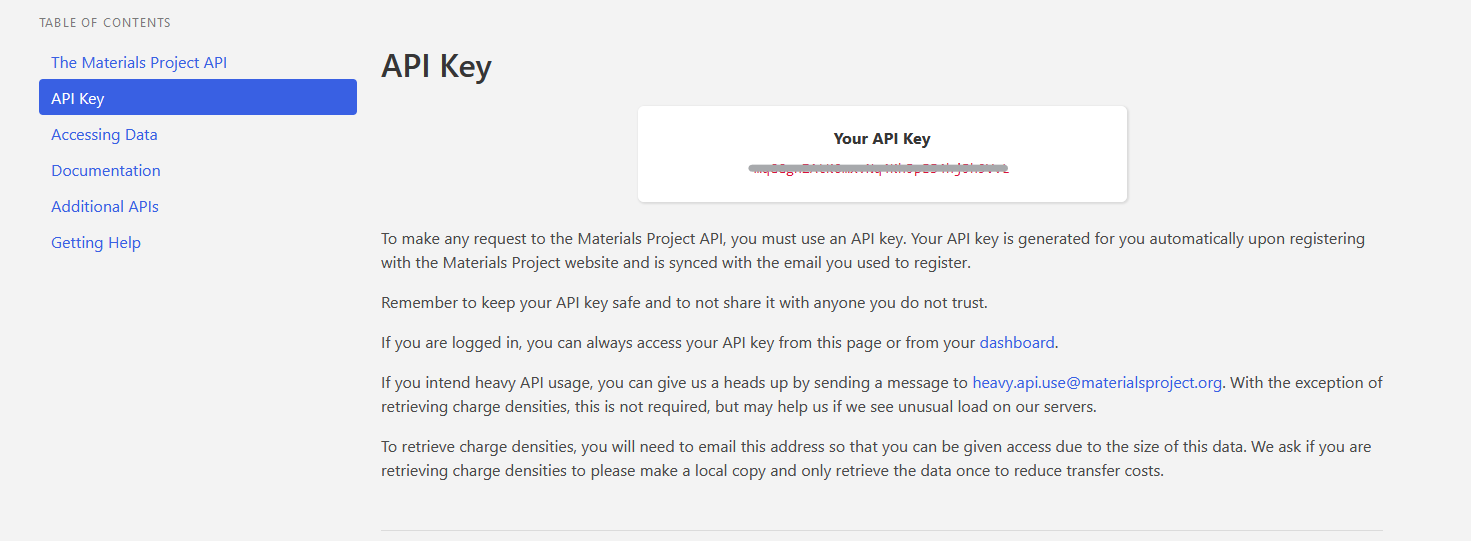

Como este *notebook* será compartilhado, eu salvei minha *api-key* em um arquivo de texto chamado "pymatgen-api.txt". Em seguida, eu utilizo a função *open()* para abrir o arquivo e atribuo o nome "f" (de *file*, mas pode ser qualquer palavra/letra não reservada). Finalmente uso o método *.readline()* para ler o conteúdo do arquivo, o atribuindo a uma variável *senha*.

ps. O comando *with* cria um contexto para garantior que o arquivo seja fechado sem eu ter que explicitamente fecha-lo. : 

In [ ]:
with open('drive/MyDrive/Colab Notebooks/pymatgen/pymatgen-api.txt') as f:
    senha = f.readline()

Agora vamos de fato requisitar a api do Materials Project. Primeiro importamos a biblioteca [*Requests*](https://requests.readthedocs.io/en/latest/), que é bastante popular e prática para criarmos requisições *web*. Criamos uma variável para especificar a url que queremos consultar e uma segunda variável *headers* para armazenar nossa senha. Em seguida fazemos uma requisação do tipo *GET*.

In [ ]:
import requests 
url ="https://www.materialsproject.org/rest/v2/materials/Fe2O3/vasp"
headers = {
    "x-api-key":senha
}

r = requests.get(url, headers=headers)

Agora podemos verificar se nossa requisação foi bem sucedida.

In [ ]:
r.status_code

200

In [ ]:
r.text

'{"response": [{"energy": -517.66387638, "energy_per_atom": -6.470798454750001, "volume": 978.3696328071575, "formation_energy_per_atom": -1.6288803575000004, "nsites": 80, "unit_cell_formula": {"Fe": 32.0, "O": 48.0}, "pretty_formula": "Fe2O3", "is_hubbard": true, "elements": ["Fe", "O"], "nelements": 2, "e_above_hull": 0.278477985250003, "hubbards": {"Fe": 5.3, "O": 0.0}, "is_compatible": true, "spacegroup": {"symprec": 0.1, "source": "spglib", "symbol": "P1", "number": 1, "point_group": "1", "crystal_system": "triclinic", "hall": "P 1"}, "task_ids": ["mp-1244911"], "band_gap": 0.2603, "density": 4.336495912109739, "icsd_id": null, "icsd_ids": [], "cif": "# generated using pymatgen\\ndata_Fe2O3\\n_symmetry_space_group_name_H-M   \'P 1\'\\n_cell_length_a   8.64756077\\n_cell_length_b   10.93536246\\n_cell_length_c   10.37500235\\n_cell_angle_alpha   89.30778653\\n_cell_angle_beta   91.84781119\\n_cell_angle_gamma   93.81732473\\n_symmetry_Int_Tables_number   1\\n_chemical_formula_stru

## Pymatgen

Os notebooks também permitem que sejam instaladas outras bibliotecas devidamente registrada, para isso devemos executar comandos [*bash*](https://pt.wikipedia.org/wiki/Bash) precididos por um sinal **!**. Por padrão, o ambiente colab não fornece a biblioteca pymatgenNa próxima célula instalaremos o [PyMatgen](https://pymatgen.org/). O comando *capture* apenas omite as mensagens de saída durante a instalção.


In [ ]:
%%capture
!pip install pymatgen

In [ ]:
import pymatgen
print(pymatgen.core.__version__)

2022.0.17


In [ ]:
!cd 'drive/MyDrive/Colab Notebooks' && ls

In [ ]:
from pymatgen.core import Structure, Lattice
# convert 335 pm to A:
a = 2.866 # lattice parameter, a
latt = Lattice([[a, 0, 0], [0, a, 0], [0, 0, a]])
Fe = Structure(latt, ['Fe', 'Fe'], [(0, 0, 0), (0.5, 0.5, 0.5)])
print(Fe)
print(Fe.volume)
print(Fe.density)

Full Formula (Fe2)
Reduced Formula: Fe
abc   :   2.866000   2.866000   2.866000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe    0    0    0
  1  Fe    0.5  0.5  0.5
23.541197896000003
7.878342009947901 g cm^-3
